In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from highlight_text import fig_text
import matplotlib as mpl
import seaborn as sns
from mplsoccer import VerticalPitch
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('arda_guler.xlsx','passes')
df

,player,minute,second,outcome,type,x,y,endX,endY
0,Arda_Güler,69,24,succesful,Pass,49,50,40,25
1,Arda_Güler,70,35,succesful,Pass,63,48,75,83
2,Arda_Güler,74,47,unsuccesfull,Pass,74,58,71,65
3,Arda_Güler,75,2,succesful,Pass,76,68,95,78
4,Arda_Güler,79,8,succesful,Pass,96,20,96,38
...,...,...,...,...,...,...,...,...,...
11,Arda_Güler,87,17,succesful,Pass,38,42,37,51
12,Arda_Güler,88,5,succesful,Pass,53,44,38,42
13,Arda_Güler,89,9,succesful,Pass,61,63,64,63
14,Arda_Güler,91,35,succesful,Pass,96,33,91,34


In [3]:
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [4]:
df

,player,minute,second,outcome,type,x,y,endX,endY
0,Arda_Güler,69,24,succesful,Pass,58.8,40.0,48.0,20.0
1,Arda_Güler,70,35,succesful,Pass,75.6,38.4,90.0,66.4
2,Arda_Güler,74,47,unsuccesfull,Pass,88.8,46.4,85.2,52.0
3,Arda_Güler,75,2,succesful,Pass,91.2,54.4,114.0,62.4
4,Arda_Güler,79,8,succesful,Pass,115.2,16.0,115.2,30.4
...,...,...,...,...,...,...,...,...,...
11,Arda_Güler,87,17,succesful,Pass,45.6,33.6,44.4,40.8
12,Arda_Güler,88,5,succesful,Pass,63.6,35.2,45.6,33.6
13,Arda_Güler,89,9,succesful,Pass,73.2,50.4,76.8,50.4
14,Arda_Güler,91,35,succesful,Pass,115.2,26.4,109.2,27.2


Text(0.5, 1.0, 'Arda Guler Pass Map vs Goztepe')

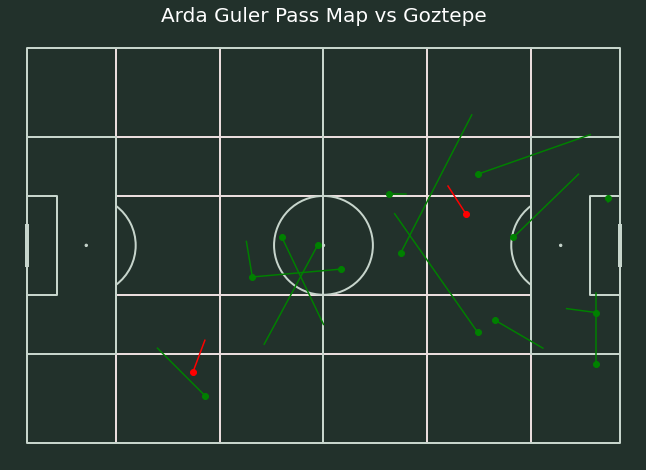

In [5]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')


pitch = Pitch(pitch_type='statsbomb',positional=True,
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)


pitch.draw(ax=ax)
plt.gca().invert_yaxis()



for x in range(len(df['x'])):
    if df['outcome'][x] == 'succesful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='green')
        plt.scatter(df['x'][x],df['y'][x],color='green')
    if df['outcome'][x] == 'unsuccesfull':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='red')
        plt.scatter(df['x'][x],df['y'][x],color='red')

plt.title('Arda Guler Pass Map vs Goztepe',color='white',size=20)

Text(0.5, 1.0, "Arda Guler's Passes vs Goztepe")

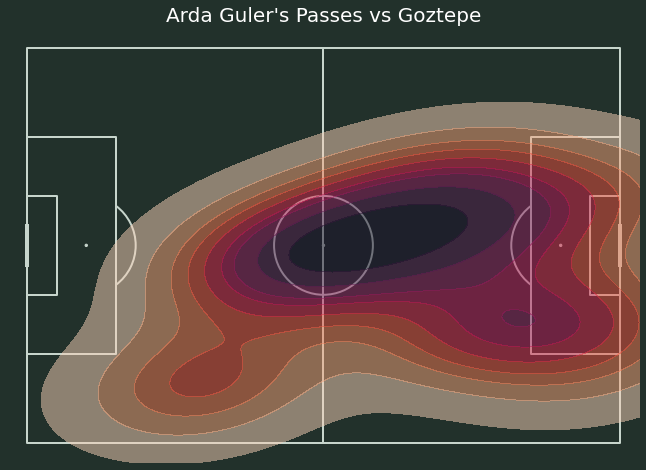

In [52]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)


pitch.draw(ax=ax)
plt.gca().invert_yaxis()


kde = sns.kdeplot(
        df['x'],
        df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'rocket_r'
)

plt.title("Arda Guler's Passes vs Goztepe",color='white',size=20)

In [53]:
data=pd.read_excel('arda_guler.xlsx','shots')
data

,player,minute,second,team,shooted,x,y
0,Arda Guler,82,50,Fenerbahce SK,Goal,40.05,108.25
1,Arda Guler,85,36,Fenerbahce SK,Missed,32.30,103.36


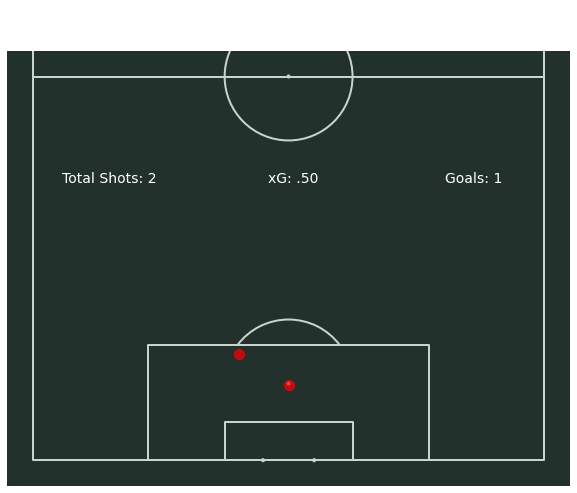

In [54]:
fig, ax = plt.subplots(figsize=(13,8))
fig.set_facecolor('white')
ax.patch.set_facecolor('white')

pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, goal_type='circle',tight_layout=True, half=True)

pitch.draw(ax=ax)


plt.gca().invert_yaxis()


plt.scatter(data['x'],data['y'], s=100,c='red',alpha=.7)



s="Arda Guler's Shots vs Goztepe"
fig_text(s=s,
        x=.3,y=0.95,
        
        
        fontsize=24,
        color='white'

)

total_shots = len(df)

fig_text(s='Total Shots: 2',
        x=.27, y =.67, fontsize=14,color='white')
fig_text(s=f'xG: .50',
        x=.49, y =.67, fontsize=14,color='white')
fig_text(s=f'Goals: 1',
        x=.68, y =.67, fontsize=14,color='white')